<a href="https://colab.research.google.com/github/rodr1ggoql17/Procesamiento-Digital-Informacion/blob/main/erosion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pylab as plt
import skimage.io as io

In [ ]:
img = io.imread('/content/drive/MyDrive/Procesamiento digital informacion/Images/lineas2.png',as_gray=True)

In [ ]:
img

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

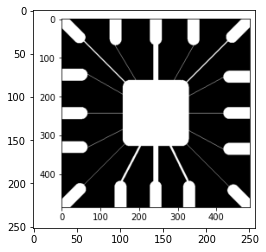

In [ ]:
plt.figure()
plt.imshow(img,cmap='gray')

In [ ]:
img_normalizada = img.copy()/255
img_normalizada

array([[0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       ...,
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157],
       [0.00392157, 0.00392157, 0.00392157, ..., 0.00392157, 0.00392157,
        0.00392157]])

In [ ]:
array_ones = np.ones((5,5))
array_ones[0,0] = 0
array_ones[0,1] = 0
array_ones[0,3] = 0
array_ones[0,4] = 0
array_ones[1,0] = 0
array_ones[1,1] = 0
array_ones[1,3] = 0
array_ones[1,4] = 0
array_ones[3,0] = 0
array_ones[3,1] = 0
array_ones[3,3] = 0
array_ones[3,4] = 0
array_ones[4,0] = 0
array_ones[4,1] = 0
array_ones[4,3] = 0
array_ones[4,4] = 0

In [ ]:
img.shape

(252, 257)

In [ ]:
np.sum(img[:5,:5]*array_ones)

9.0

In [ ]:
img.shape

(252, 257)

In [ ]:
def dilatacion(img,array_ones):
  nfr = img.shape[0]-array_ones.shape[0]+1
  ncr = img.shape[1]-array_ones.shape[1]+1
  R = np.zeros((nfr,ncr))
  for i in range(nfr):
    for j in range(ncr):
      temp = img[i:i+array_ones.shape[0],j:j+array_ones.shape[1]]
      temp2 = temp *array_ones
      if np.sum(temp2)>0:
        R[i,j] = 1
  return R

In [ ]:
def erosion(img,array_ones):
  nfr = img.shape[0]-array_ones.shape[0]+1
  ncr = img.shape[1]-array_ones.shape[1]+1
  R = np.zeros((nfr,ncr))
  for i in range(nfr):
    for j in range(ncr):
      temp = img[i:i+array_ones.shape[0],j:j+array_ones.shape[1]]
      temp2 = temp *array_ones
      if np.sum(temp2)==np.sum(array_ones):
        R[i,j] = 1
  return R

In [ ]:
def closing(img,array_ones):
  R = erosion(dilatacion(img,array_ones),array_ones)
  return R

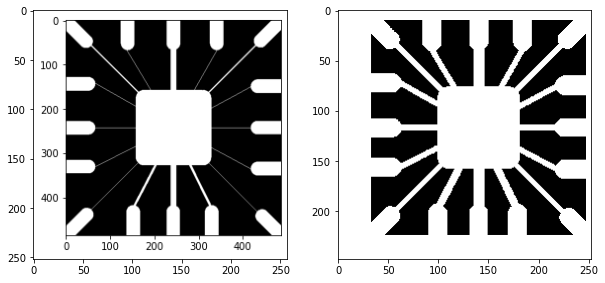

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,10))
ax[0].imshow(img,cmap='gray')
ax[1].imshow(R,cmap='gray')